## Examen 3
1. Considere una matrix $A$, $3\times 3$ real, que se pueda diagonalizar con una transformación del  tipo
\begin{align}
  A_{\text{diag}}=P^T\cdot A \cdot U\,,
\end{align}
donde $P$ es una matrix de permutación ortogonal, es decir, de entradas 0 y $\pm 1$, y $U$ es una matriz de rotación en términos de tres ángulos de mezcla: $\theta_{12}$, $\theta_{23}$, $\theta_{13}$
\begin{align*}                                                                  
U=\begin{bmatrix}                                                                 
c_{12}c_{13}                    &s_{12}c_{13}                & s_{13}  \\       
-s_{12}c_{23}-c_{12}s_{23}s_{13}  & c_{12}c_{23}-s_{12}s_{23}s_{13}& s_{23}c_{13}\\                            s_{12}s_{23}-c_{12}c_{23}s_{13}  &-c_{12}s_{23}-s_{12}c_{23}s_{13}& c_{23}c_{13}\\ 
\end{bmatrix}                                                                   
\end{align*}
donde $c_{12}=\cos\theta_{12}$, etc. Construya una función de python, que acepte como entrada una matrix, y entrege como salida los tres autovectores ordenados de mayor a menor y los tres ángulos de mezcla en grados.  Aplique dicha función sobre la matrix:
```
A=np.array( [
 [7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
 [2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
 [6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )
```
3. Grafique el espacio de configuración elongación-velocidad, de una masa $m=1\ $Kg  en el extremo de un resorte de constante elástica $k=1\ $N/m sometida a una fuerza de fricción proporcional a velocidad con coeficiente de fricción $b=1/3\ $N$\cdot$s/m. Considere elongaciónes iniciales en el intervalo $-1\ $m a $1\ $m y velocidades iniciales entre $-1\ $m/s y $1\ $m/s

In [2]:
#PRIMER PUNTO

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
from scipy import linalg
import numpy as np
from numpy import linalg
import scipy.integrate as integrate


In [124]:
A=np.array( [
[7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
[2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
[6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )


In [142]:

λ1,V=np.linalg.eig(np.dot(A,A.transpose())) #V


λ2,U=np.linalg.eig( np.dot(A.transpose(),A) ) #U

np.sqrt(λ1), np.sqrt(λ2)

#np.dot( np.dot( V.transpose(),A),UU).round(13)

(array([11.,  3.,  4.]), array([11.,  3.,  4.]))

In [152]:
#SEA B LA MATRIZ QUE REPREENTA A A DIAGONALIZADA CON AUTOVALORES DE MAYOR A MENOR


W=np.hstack(  [ np.reshape( V[:,0],(3,1)  ),
                 np.reshape( V[:,2],(3,1)  ),
                 np.reshape( V[:,1],(3,1)  )] )
WW=np.hstack(  [ np.reshape( UU[:,0],(3,1)  ),
                 np.reshape( UU[:,2],(3,1)  ),
                 np.reshape( UU[:,1],(3,1)  )] )


np.dot( np.dot( W.transpose(),A),WW).round(13)



array([[ 0.7071057 ,  0.00174533, -0.7071057 ],
       [-0.69657855,  0.17364791, -0.69614994],
       [ 0.12157242,  0.98480625,  0.12400319]])

In [151]:
#SABEMOS QUE WW ES EL "U" QUE DIAGONALIZA ORDENADAMENTE

theta13=np.arcsin(WW[0,2])
theta13d=theta13*180/np.pi

theta12=np.arcsin(WW[0,1]/np.cos(theta13))
theta12d=theta12*180/np.pi

theta23=np.arcsin(WW[1,2]/np.cos(theta13))
theta23d=theta23*180/np.pi



-44.999912733626

In [156]:
#AHORA PUES, LOS AUTOVECTORES SON:

eiv1=np.array(WW[:,0])
eiv2=np.array(WW[:,1])
eiv3=np.array(WW[:,2])


In [159]:
print('los autovectores son {}, {}, {}'.format(eiv1,eiv2,eiv3))
print('los ángulos son {}º, {}º, {}º'.format(theta13d, theta12d, theta23d))

los autovectores son [ 0.7071057  -0.69657855  0.12157242], [0.00174533 0.17364791 0.98480625], [-0.7071057  -0.69614994  0.12400319]
los ángulos son -44.999912733626º, 0.14142121263962465º, -79.90000015230834º


In [ ]:
#PUNTO 2

In [118]:
m=1 #Masa [kg]
b=1/3 #Coeficiente de fricción [n*s/m]
k=1 #Constante del resorte [n/m]
g=9.8 #Aceleración de la gravedad [m/s2]

In [119]:
x0, v0 = [0, 1] #Condiciones iniciales

In [120]:
def dU_dt(U, t, b, k, m, g):
    x, v = U
    return [v, -(b/m)*v-k*x/m]

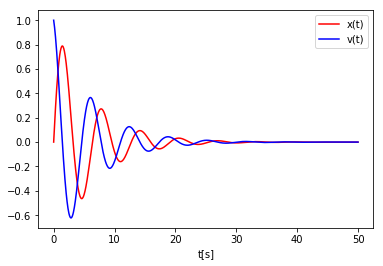

In [121]:
#VERIFICAMOS LA ECUACIÓN
t_max = 50 # [s]
t = np.linspace(0,t_max,1000)
U = integrate.odeint(dU_dt, [x0,v0], t, args=(b,k, m, g))
plt.plot(t, U[:,0], '-r', label='x(t)')
plt.plot(t, U[:,1], '-b', label='v(t)')
plt.xlabel('t[s]')
plt.legend()

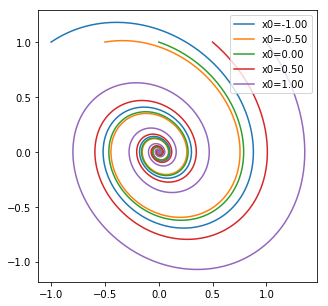

In [122]:
#GRAFICAMOS EL ESPACIO
fig, ax = plt.subplots(1,1,figsize=(5,5))
for x0 in np.linspace(-1,1,5):
    U = integrate.odeint(dU_dt, [x0,v0], t, args=(b,k, m, g))
    ax.plot(U[:,0], U[:,1], label='x0=%.2f'%(x0))

ax.legend()

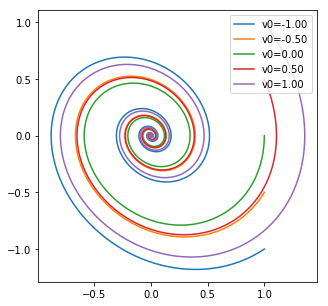

In [123]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
for v0 in np.linspace(-1.0,1,5):
    U = integrate.odeint(dU_dt, [x0,v0], t, args=(b,k, m, g))
    ax.plot(U[:,0], U[:,1], label='v0=%.2f'%(v0))

ax.legend()